## Analyzing ride-sharing patterns

Ride-sharing data on multiple ride-sharing companies will be analyzed to find patterns, understand passenger preferences, and gain insight into the impact of external factors on rides.

### Exploratory data analysis (Python)

In [ ]:
import pandas as pd

In [ ]:
from scipy import stats as st

In [ ]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')

In [ ]:
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [ ]:
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


#### Identifying the top 10 neighborhoods in terms of drop-offs

In [ ]:
top_10 = df2.sort_values(by='average_trips', ascending=False).head(10)

In [ ]:
top_10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Graph 1: Taxi Companies and Number of Rides

[Text(0, 0.5, 'Number of Rides'), Text(0.5, 0, 'Taxi Companies')]

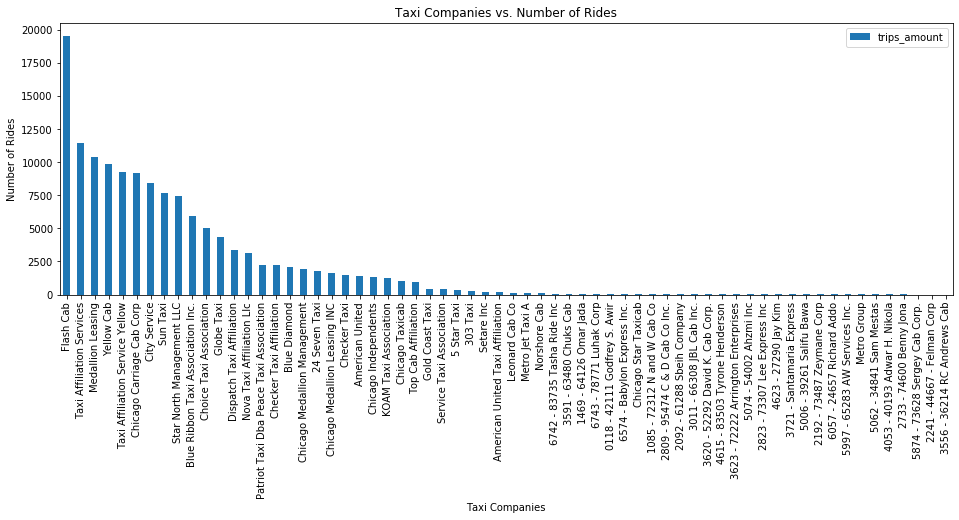

In [ ]:
df1.plot(kind='bar', x='company_name', title="Taxi Companies vs. Number of Rides", figsize=(16,5)).set(xlabel="Taxi Companies", ylabel="Number of Rides")

#### Graph 2: Top 10 Neighborhoods by Number of Drop-offs

[Text(0, 0.5, 'Number of Drop-offs'), Text(0.5, 0, 'Neighborhoods')]

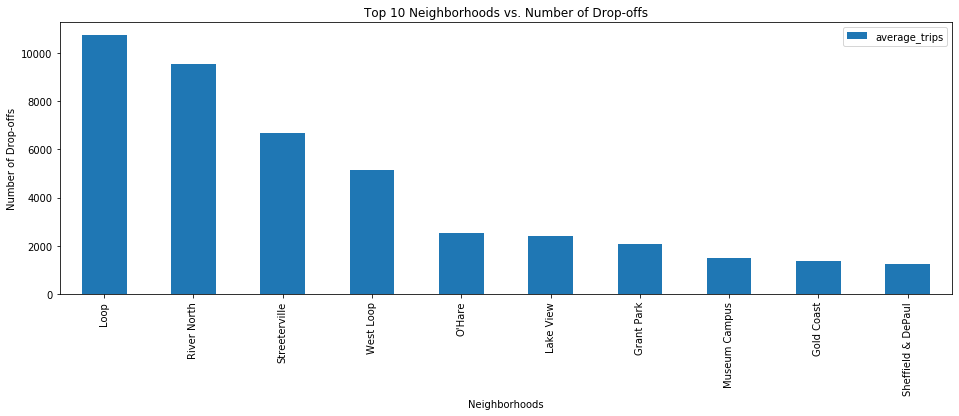

In [ ]:
top_10.plot(kind='bar', x='dropoff_location_name', title="Top 10 Neighborhoods vs. Number of Drop-offs", figsize=(16,5)).set(xlabel="Neighborhoods", ylabel="Number of Drop-offs")

### Conclusion

2 files were imported.

The first file, `df1`, contains taxi company names and the number of rides for each taxi company from November 15-16, 2017. The second file, `df2`, contains dropoff location names and the average number of rides that ended in each neighborhood in November 2017.

The initial datatypes on both files are correct.

"Flash Cab" is the dominant taxi company in the first dataset, having completed 19,558 rides on November 15-16, 2017. "Taxi Affiliation Services" follows at 11,422 rides, and "Medallion Leasing" at 10,367 rides. About half of the companies on the first dataset had little to no rides completed for November 15-16, 2017.

The top 10 neighborhoods in terms of drop-offs are, in decreasing order: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul.

### Testing hypotheses (Python)

In [ ]:
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [ ]:
df3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'])

`df3` contains data on Saturday rides from the Loop to O'Hare International Airport.

`start_ts` is converted from an object datatype into a datetime column to better suit the data contained in the column.

#### Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [ ]:
st.levene(df3.loc[df3['weather_conditions'] == 'Good', 'duration_seconds'], df3.loc[df3['weather_conditions'] == 'Bad', 'duration_seconds'])

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

In [ ]:
saturday_rides = st.ttest_ind(df3.loc[df3['weather_conditions'] == 'Good', 'duration_seconds'], df3.loc[df3['weather_conditions'] == 'Bad', 'duration_seconds'])

alpha = .05

print('p-value: ', saturday_rides.pvalue)

if (saturday_rides.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We fail to reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


### Conclusion

H0: The average duration of rides from the Loop to O'Hare International Airport is the same in all types of weather on Saturdays

H1: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

`st.ttest_ind()` from the SciPy library is used to test this hypothesis because we are analyzing the means of two independent statistical populations. `equal_var` is kept as True here because the p-value returned from Levene's test is greater than 0.05. 

The resulting p-value of this hypothesis test is less than 0.05, so we reject the null hypothesis. Therefore, the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.